In [591]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import norm
from scipy.stats import ttest_1samp , ttest_ind
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [593]:
#1.1 What is the probability that a randomly chosen player would suffer an injury?
total_injured = 145
total_players = 235
prop_injured = total_injured/total_players
print("The probability that a randomly chosen player would suffer an injury is", round(prop_injured, 4))

The probability that a randomly chosen player would suffer an injury is 0.617


In [595]:
#1.2 What is the probability that a player is a forward or a winger?
total_forward = 94
total_winger = 29
total_players = 235
prop_forward_or_winger = (total_forward + total_winger)/total_players
print("The probabilty that a player is a forward or a winger is", round(prop_forward_or_winger, 4))

The probabilty that a player is a forward or a winger is 0.5234


In [597]:
#1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?
total_injured_striker = 45
total_players = 235
prop_striker_and_injured = total_injured_striker/total_players
print("The probability that a randomly chosen player who plays in a striker position and has a foot injury is", round(prop_striker_and_injured, 4))

The probability that a randomly chosen player who plays in a striker position and has a foot injury is 0.1915


In [599]:
#1.4 What is the probability that a randomly chosen injured player is a striker?
total_injured_striker = 45
total_injured = 145
prop_injured_striker = total_injured_striker/total_injured
print("The probabilty that a randomly chosen injured player is a striker is", round(prop_injured_striker, 4))

The probabilty that a randomly chosen injured player is a striker is 0.3103


In [601]:
#2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?
#Parameters
mu = 5
sigma = 1.5
threshold = 3.17

#Calculating the CDF
prop_less_than_threshold = norm.cdf(3.17, mu, sigma)
print("Proportion of bags with breaking strength less than 3.17 kg/sq cm is", round(prop_less_than_threshold, 4))

Proportion of bags with breaking strength less than 3.17 kg/sq cm is 0.1112


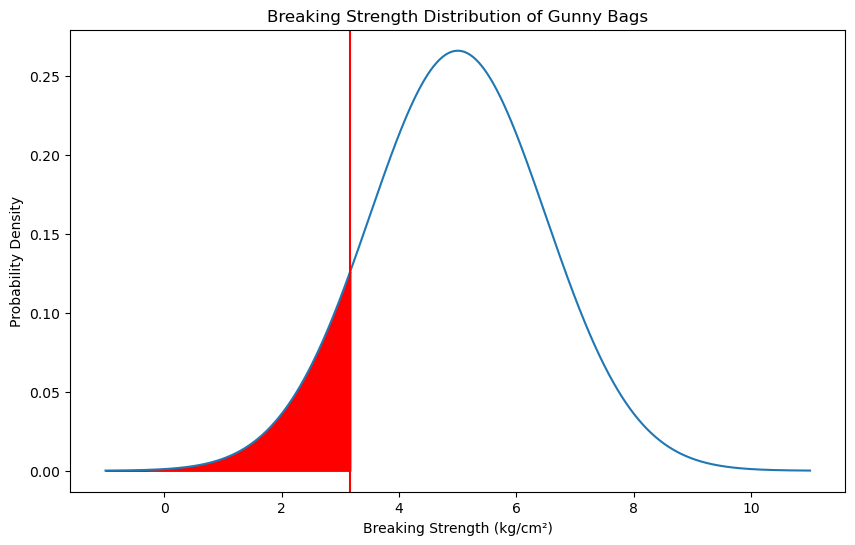

In [603]:
#Creating an array
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x < threshold), color='red')
plt.axvline(threshold, color='red')
plt.title('Breaking Strength Distribution of Gunny Bags')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.show()

In [605]:
#2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?
# Parameters
mu = 5
sigma = 1.5
threshold = 3.6

# Calculate the proportion of bags with breaking strength >= threshold
proportion_at_least = 1 - norm.cdf(threshold, mu, sigma)

print("Proportion of gunny bags with breaking strength of at least 3.6 kg/cm² is",  round(proportion_at_least, 4))

Proportion of gunny bags with breaking strength of at least 3.6 kg/cm² is 0.8247


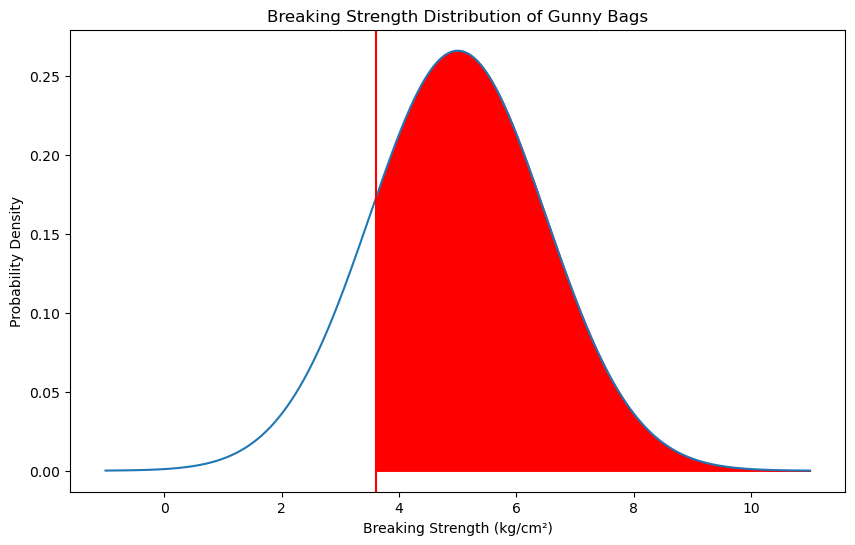

In [607]:
#Creating an array
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x >= threshold), color='red')
plt.axvline(threshold, color='red')
plt.title('Breaking Strength Distribution of Gunny Bags')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.show()

In [609]:
#2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?
#Parameters
mu = 5
sigma = 1.5
lower_threshold = 5
upper_threshold = 5.5
# Compute CDF values for both thresholds
cdf_lower = norm.cdf(lower_threshold, mu, sigma)
cdf_upper = norm.cdf(upper_threshold, mu, sigma)
# Calculate the proportion of bags with breaking strength between the thresholds
proportion = cdf_upper - cdf_lower
print("Proportion of gunny bags with breaking strength between 5 and 5.5 kg/cm² is", round(proportion,4))

Proportion of gunny bags with breaking strength between 5 and 5.5 kg/cm² is 0.1306


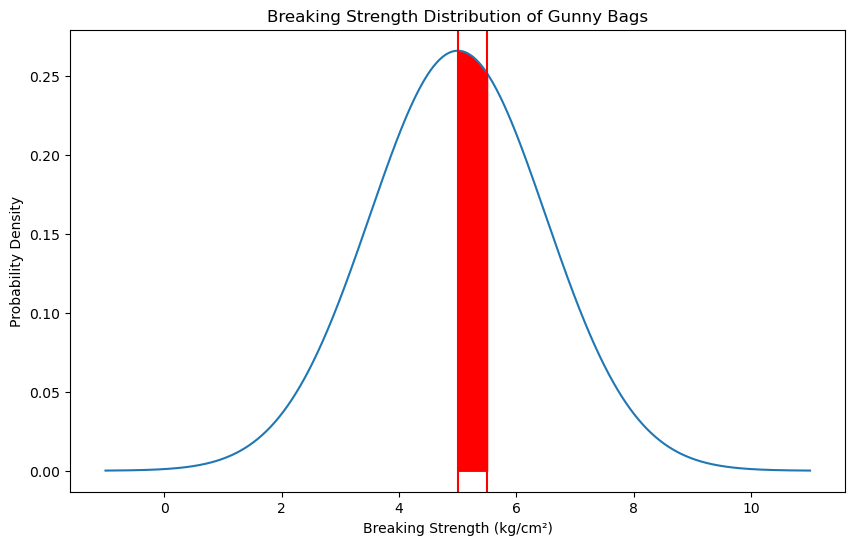

In [611]:
# Creating an array
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x >= lower_threshold) & (x <= upper_threshold), color='red')
plt.axvline(lower_threshold, color='red')
plt.axvline(upper_threshold, color='red')
plt.title('Breaking Strength Distribution of Gunny Bags')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.show()

In [613]:
#2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?
#Parameters
mu = 5
sigma = 1.5
lower_threshold = 3
upper_threshold = 7.5

# Compute CDF values for both thresholds
cdf_lower = norm.cdf(lower_threshold, mu, sigma)
cdf_upper = norm.cdf(upper_threshold, mu, sigma)

# Calculate the proportion of bags with breaking strength between the thresholds
proportion_between = cdf_upper - cdf_lower

# Proportion of bags not in the range
proportion_not_between = 1 - proportion_between
# Print the proportion
print("Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/cm² is", round(proportion_not_between, 4))

Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/cm² is 0.139


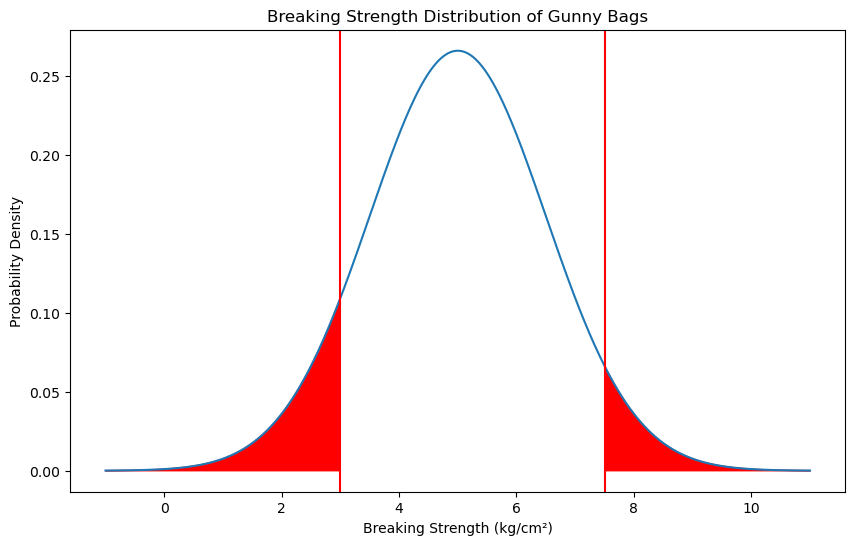

In [615]:
# Creating an array
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x < lower_threshold) | (x > upper_threshold), color='red')
plt.axvline(lower_threshold, color='red')
plt.axvline(upper_threshold, color='red')
plt.title('Breaking Strength Distribution of Gunny Bags')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.show()


In [145]:
#Loading the Dataset of Zingaro Company
path = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\2 - Inferential Statistics\\Project Work - Coded\\Zingaro_Company.csv'
df1 = pd.read_csv(path)

In [147]:
#Viewing the dataset
df1.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [149]:
#Checking the shape of the dataset
df1.shape

(75, 2)

In [151]:
#Checking the data types of the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [153]:
#Check for any missing values
df1.isna().sum() 

Unpolished              0
Treated and Polished    0
dtype: int64

In [155]:
#Checking the statistical summary of the dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


In [343]:
#3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?
# One-sample t-test
mu_0 = 150
t_statistic, p_value = stats.ttest_1samp(df1['Unpolished '], mu_0)
print("the t_statistic is", round(t_statistic, 4))
print("the p_value is", p_value)

the t_statistic is -4.1646
the p_value is 8.342573994839304e-05


In [347]:
#As t-test is two-tailed by default it is divided by 2
p_value_one_tailed = p_value / 2
print("the value of one tailed p_value is", p_value_one_tailed)

the value of one tailed p_value is 4.171286997419652e-05


In [335]:
if p_value_one_tailed < 0.05:
    print("The mean hardness of unpolished stones is significantly less than 150.")
else:
    print("The mean hardness of unpolished stones is not significantly less than 150.")

The mean hardness of unpolished stones is significantly less than 150.


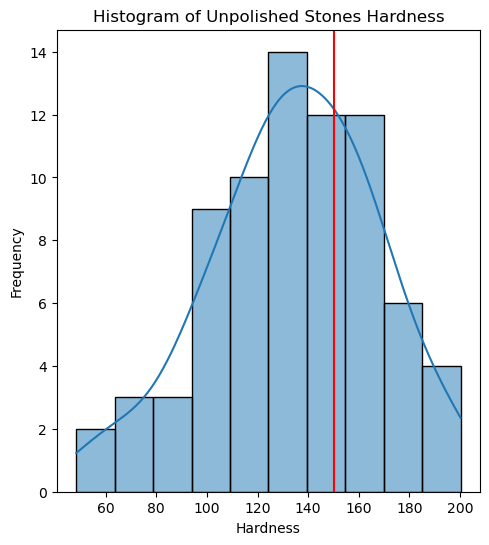

In [337]:
#Plotting the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['Unpolished '], kde=True, bins=10)
plt.axvline(x=150, color='red')
plt.title('Histogram of Unpolished Stones Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.show()

In [361]:
#3.2 Is the mean hardness of the polished and unpolished stones the same?
# Two-sample t-test
t_statistic, p_value = stats.ttest_ind(df1['Unpolished '], df1['Treated and Polished'], equal_var = False)

print("The value of the t_statistitc is", round(t_statistic, 4))
print("The value of the p_value is", round(p_value, 4))

The value of the t_statistitc is -3.2422
The value of the p_value is 0.0016


In [355]:
if p_value < 0.05:
    print("The mean hardness of polished and unpolished stones is significantly different.")
else:
    print("The mean hardness of polished and unpolished stones is not significantly different.")

The mean hardness of polished and unpolished stones is significantly different.


In [373]:
#Loading the Dataset of Zingaro Company
path = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\2 - Inferential Statistics\\Project Work - Coded\\Dental+Hardness+data.xlsx'
df2 = pd.read_excel(path)

In [375]:
#Viewing the dataset
df2.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [377]:
#Checking the shape of the dataset
df2.shape

(90, 5)

In [379]:
#Checking the data types of the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [383]:
#Check for any missing values
df2.isna().sum() 

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [385]:
#Checking the statistical summary of the dataset
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [387]:
df2.Dentist.value_counts()

Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64

In [389]:
df2.Method.value_counts()

Method
1    30
2    30
3    30
Name: count, dtype: int64

In [391]:
df2.Alloy.value_counts()

Alloy
1    45
2    45
Name: count, dtype: int64

In [393]:
df2.Temp.value_counts()

Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64

In [425]:
df2.Response.unique()

array([ 813,  792,  907,  835,  782,  698,  665, 1115,  870,  752,  620,
        847,  560,  585,  715,  803,  858,  882,  772,  743,  933,  824,
        673,  734,  681,  627,  762,  724,  613,  894,  649,  690,  493,
        707,  289,  312, 1048,  421,  483,  405,  536], dtype=int64)

In [659]:
alloy1_data = df2[df2['Alloy'] == 1]
alloy2_data = df2[df2['Alloy'] == 2]

In [429]:
alloy1_data.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [431]:
alloy2_data.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


In [467]:
#4.1 How does the hardness of implants vary depending on dentists?
#Hypothesis ANOVA test for alloy 1
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy1_data).fit()
anova_table = anova_lm(model)
print(anova_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [465]:
#Hypothesis ANOVA test for alloy 2
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy2_data).fit()
anova_table = anova_lm(model)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [501]:
# Normality check using Shapiro-Wilk test for alloy 1
dentist_1 = alloy1_data[alloy1_data['Dentist']==1]['Response']
dentist_2 = alloy1_data[alloy1_data['Dentist']==2]['Response']
dentist_3 = alloy1_data[alloy1_data['Dentist']==3]['Response']
dentist_4 = alloy1_data[alloy1_data['Dentist']==4]['Response']
dentist_5 = alloy1_data[alloy1_data['Dentist']==5]['Response']
print(stats.shapiro([dentist_1]))
print(stats.shapiro([dentist_2]))
print(stats.shapiro([dentist_3]))
print(stats.shapiro([dentist_4]))
print(stats.shapiro([dentist_5]))

ShapiroResult(statistic=0.9113543810870849, pvalue=0.3254693632188942)
ShapiroResult(statistic=0.9642461255698727, pvalue=0.841544387628862)
ShapiroResult(statistic=0.8721171628470361, pvalue=0.12953560483047716)
ShapiroResult(statistic=0.8368973736054908, pvalue=0.05333654291277101)
ShapiroResult(statistic=0.8534296949893417, pvalue=0.08127790851660108)


In [525]:
#Normality check using Shapiro-Wilk test for alloy 2
dentist_21 = alloy2_data[alloy2_data['Dentist']==1]['Response']
dentist_22 = alloy2_data[alloy2_data['Dentist']==2]['Response']
dentist_23 = alloy2_data[alloy2_data['Dentist']==3]['Response']
dentist_24 = alloy2_data[alloy2_data['Dentist']==4]['Response']
dentist_25 = alloy2_data[alloy2_data['Dentist']==5]['Response']
print(stats.shapiro([dentist_21]))
print(stats.shapiro([dentist_22]))
print(stats.shapiro([dentist_23]))
print(stats.shapiro([dentist_24]))
print(stats.shapiro([dentist_25]))

ShapiroResult(statistic=0.9039731107207415, pvalue=0.27593872565209243)
ShapiroResult(statistic=0.9392002455609169, pvalue=0.5735055333426523)
ShapiroResult(statistic=0.9340972440694506, pvalue=0.5213087304159562)
ShapiroResult(statistic=0.7613220140650097, pvalue=0.007332685121063265)
ShapiroResult(statistic=0.9131584516468498, pvalue=0.33861078485472895)


In [511]:
#Homogeneity of Variance check using levene test for alloy 1
print(stats.levene(dentist_1,dentist_2,dentist_3,dentist_4,dentist_5))

LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)


In [515]:
#Homogeneity of Variance check using levene test for alloy 2
print(stats.levene(dentist_21,dentist_22,dentist_23,dentist_24,dentist_25))

LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


In [541]:
#4.2 How does the hardness of implants vary depending on methods?
#Anova test for alloy 1
formula = 'Response ~ C(Method)'
model = ols(formula, alloy1_data).fit()
anova_table = anova_lm(model)
print(anova_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [673]:
#Anova test for alloy 2
formula = 'Response ~ C(Method)'
model = ols(formula, alloy2_data).fit()
anova_table = anova_lm(model)
print(anova_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [539]:
#Normality check using Shapiro-Wilk test for alloy 1
method_1 = alloy1_data[alloy1_data['Method']==1]['Response']
method_2 = alloy1_data[alloy1_data['Method']==2]['Response']
method_3 = alloy1_data[alloy1_data['Method']==3]['Response']
print(stats.shapiro([method_1]))
print(stats.shapiro([method_2]))
print(stats.shapiro([method_3]))

ShapiroResult(statistic=0.9183823715698519, pvalue=0.1819861143797435)
ShapiroResult(statistic=0.973258551140558, pvalue=0.9030333961962251)
ShapiroResult(statistic=0.9114550814979346, pvalue=0.14254827970120204)


In [671]:
#Normality check using Shapiro-Wilk test for alloy 2
method_21 = alloy2_data[alloy2_data['Method']==1]['Response']
method_22 = alloy2_data[alloy2_data['Method']==2]['Response']
method_23 = alloy2_data[alloy2_data['Method']==3]['Response']
print(stats.shapiro([method_21]))
print(stats.shapiro([method_22]))
print(stats.shapiro([method_23]))

ShapiroResult(statistic=0.9638104999897447, pvalue=0.758239031460697)
ShapiroResult(statistic=0.7557931279282883, pvalue=0.001051113443000027)
ShapiroResult(statistic=0.9021322839255671, pvalue=0.10259048044955665)


In [535]:
#Homogeneity of Variance check using levene test for alloy 1
print(stats.levene(method_1,method_2,method_3))

LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)


In [533]:
#Homogeneity of Variance check using levene test for alloy 2
print(stats.levene(method_21,method_22,method_23))

LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)


<Figure size 800x400 with 0 Axes>

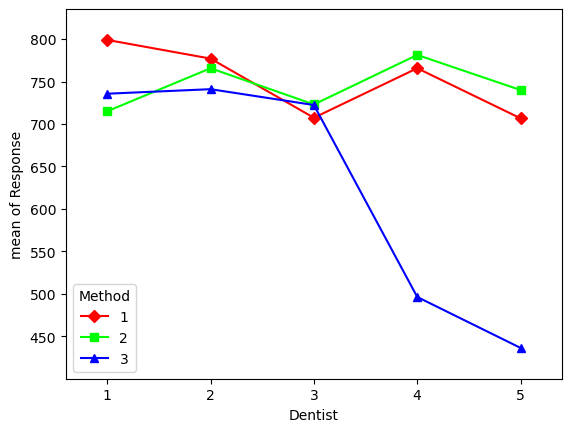

In [701]:
#4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?
#Interaction plot for Alloy 1
from statsmodels.graphics.factorplots import interaction_plot
plt.figure(figsize=(8,4))
interaction_plot(x=alloy1_data['Dentist'],
                  trace=alloy1_data['Method'],
                  response=alloy1_data['Response'],
                  markers=['D', 's', '^'])
plt.show();

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\factorplots.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (values, group) in enumerate(plot_data.groupby('trace')):


<Figure size 800x400 with 0 Axes>

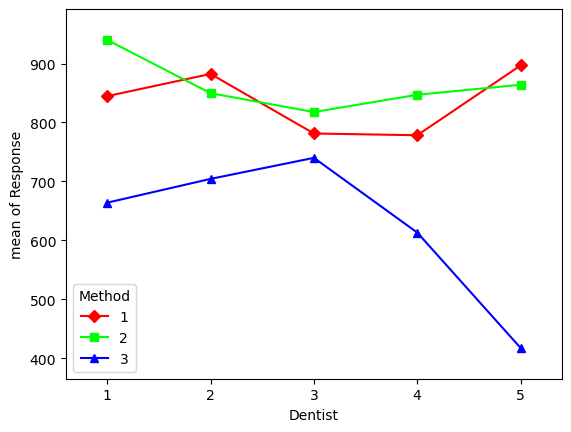

In [703]:
#Interaction plot for Alloy 2
plt.figure(figsize=(8,4))
interaction_plot(x=alloy2_data['Dentist'],
                  trace=alloy2_data['Method'],
                  response=alloy2_data['Response'],
                  markers=['D', 's', '^'])
plt.show();

In [589]:
#4.4 How does the hardness of implants vary depending on dentists and methods together?
#Anova test for alloy 1
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy1_data).fit()
anova_table = anova_lm(model)
print(anova_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [587]:
#Anova test for alloy 2
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula, alloy2_data).fit()
anova_table = anova_lm(model)
print(anova_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN
